In [1]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Часть 1

In [2]:
generate_regression <- function(x, a, b, lambda){
    
    y <- rep(1,length(x))
    sigma <- rep(1,length(x))
    
    for (i in 2:length(x)){
        sigma[i] <- lambda * sigma[i-1] +  rnorm(1, mean = 0, sd = 1)
    }
    
    for (i in 1:length(x)){
        y[i] <- a + b * x[i] + sigma[i]
    }

    return ( y )
}

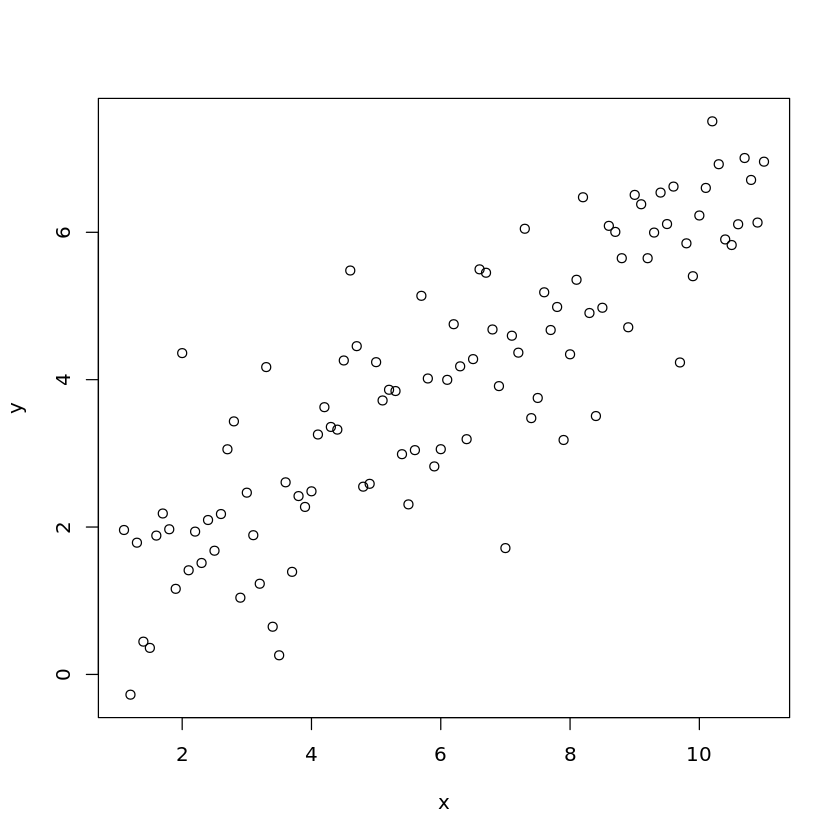

In [3]:
i <- 1:100
x <- 1 + 0.1 * i
y <- generate_regression(x, .3, .6, .2)
plot(x, y, type = "p") 

In [4]:
?plot()

plot.default {graphics},R Documentation
"x, y","the x and y arguments provide the x and y coordinates for the plot. Any reasonable way of defining the coordinates is acceptable. See the function xy.coords for details. If supplied separately, they must be of the same length."
type,"1-character string giving the type of plot desired. The following values are possible, for details, see plot: ""p"" for points, ""l"" for lines, ""b"" for both points and lines, ""c"" for empty points joined by lines, ""o"" for overplotted points and lines, ""s"" and ""S"" for stair steps and ""h"" for histogram-like vertical lines. Finally, ""n"" does not produce any points or lines."
xlim,"the x limits (x1, x2) of the plot. Note that x1 > x2 is allowed and leads to a ‘reversed axis’. The default value, NULL, indicates that the range of the finite values to be plotted should be used."
ylim,the y limits of the plot.
log,"a character string which contains ""x"" if the x axis is to be logarithmic, ""y"" if the y axis is to be logarithmic and ""xy"" or ""yx"" if both axes are to be logarithmic."
main,"a main title for the plot, see also title."
sub,a subtitle for the plot.
xlab,"a label for the x axis, defaults to a description of x."
ylab,"a label for the y axis, defaults to a description of y."
ann,a logical value indicating whether the default annotation (title and x and y axis labels) should appear on the plot.


# Часть 2

In [5]:
data <- read.table(file = "../Data/flats_1.txt", header = TRUE)
# data

In [6]:
model <- lm(Rent ~ M2, data = data)
gqtest(model)


	Goldfeld-Quandt test

data:  model
GQ = 7.0517, df1 = 23, df2 = 23, p-value = 7.421e-06
alternative hypothesis: variance increases from segment 1 to 2


In [7]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 2.504, p-value = 0.9599
alternative hypothesis: true autocorrelation is greater than 0


Присутствует **гетероскедастичность**